In [474]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import json

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix

#  Classification of flower images

# Baseline: Logistic Regression

In [475]:
train = np.load('D:/meme_data/features/train_flower.npz')
img_feature = train['img_feature']
label= train['label']

index = np.arange(len(label))
np.random.shuffle(index)
img_feature = img_feature[index,:]
label= label[index]

num_classes = len(np.unique(label))

In [476]:
val_ratio = 0.2
L_val = int(val_ratio * len(label))

label_train = label[:-L_val]
label_val = label[-L_val:]

img_feature_train = img_feature[:-L_val, :]
img_feature_val = img_feature[-L_val:, :]

In [477]:
clf = LogisticRegression(random_state=0).fit(img_feature_train, label_train)
prob = clf.predict_proba(img_feature_train)
print('Training AUC ROC with image:', roc_auc_score(label_train, prob, multi_class='ovo'))


prob = clf.predict_proba(img_feature_val)
print('Validation AUC ROC with image:', roc_auc_score(label_val, prob, multi_class='ovo'))

Training AUC ROC with image: 0.9987003124984337
Validation AUC ROC with image: 0.9990003775463423


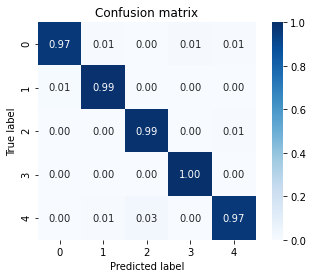

In [478]:
prob = clf.predict_proba(img_feature_val)

confusion = confusion_matrix(
label_val, prob.argmax(axis = 1))
confusion_normalized = confusion.astype("float") / confusion.sum(axis=1)

axis_labels = range(num_classes)
ax = sns.heatmap(
    confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
    cmap='Blues', annot=True, fmt='.2f', square=True)
plt.title("Confusion matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# Dense classifier

In [489]:
train = np.load('D:/meme_data/features/train_flower.npz')
img_feature = train['img_feature']
label= train['label']

index = np.arange(len(label))
np.random.shuffle(index)
img_feature = img_feature[index,:]
label= label[index]

num_classes = len(np.unique(label))

In [490]:
val_ratio = 0.2
L_val = int(val_ratio * len(label))

label_train = label[:-L_val]
label_val = label[-L_val:]

img_feature_train = img_feature[:-L_val, :]
img_feature_val = img_feature[-L_val:, :]

In [491]:
N_feature = img_feature.shape[1]

model = Sequential([
    layers.Dense(32, activation='sigmoid'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [492]:
epochs = 40
history = model.fit(
    img_feature_train, label_train,
    epochs=epochs, 
    validation_data = (img_feature_val, label_val)
)

Train on 2936 samples, validate on 734 samples
Epoch 1/40
2936/2936 [==============================] - 1s 508us/sample - loss: 1.5134 - accuracy: 0.3563 - val_loss: 1.3468 - val_accuracy: 0.5763
Epoch 2/40
2936/2936 [==============================] - 0s 147us/sample - loss: 1.2289 - accuracy: 0.5807 - val_loss: 1.0031 - val_accuracy: 0.8311
Epoch 3/40
2936/2936 [==============================] - 1s 181us/sample - loss: 0.8612 - accuracy: 0.7769 - val_loss: 0.6074 - val_accuracy: 0.9046
Epoch 4/40
2936/2936 [==============================] - 1s 175us/sample - loss: 0.5410 - accuracy: 0.8726 - val_loss: 0.3796 - val_accuracy: 0.9319
Epoch 5/40
2936/2936 [==============================] - 1s 282us/sample - loss: 0.3637 - accuracy: 0.9149 - val_loss: 0.2666 - val_accuracy: 0.9441
Epoch 6/40
2936/2936 [==============================] - 1s 184us/sample - loss: 0.2802 - accuracy: 0.9247 - val_loss: 0.2166 - val_accuracy: 0.9469
Epoch 7/40
2936/2936 [==============================] - 1s 172us/

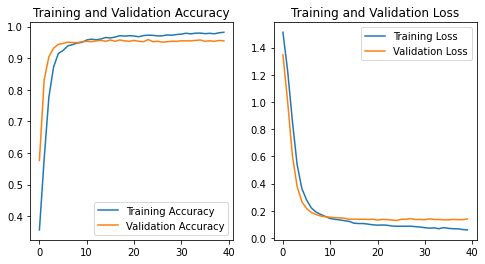

In [493]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [494]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

prob = probability_model.predict(img_feature_train)
print('Training AUC ROC with image:', roc_auc_score(label_train, prob, multi_class='ovo'))

prob = probability_model.predict(img_feature_val)
print('Validation AUC ROC with image:', roc_auc_score(label_val, prob, multi_class='ovo'))

Training AUC ROC with image: 0.9995498352475349
Validation AUC ROC with image: 0.9966489258245295


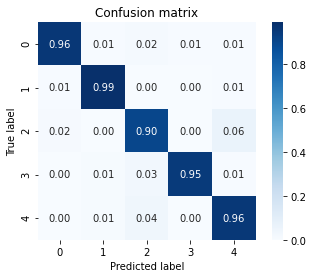

In [495]:
prob = probability_model.predict(img_feature_val)

confusion = confusion_matrix(
label_val, prob.argmax(axis = 1))
confusion_normalized = confusion.astype("float") / confusion.sum(axis=1)

axis_labels = range(num_classes)
ax = sns.heatmap(
    confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
    cmap='Blues', annot=True, fmt='.2f', square=True)
plt.title("Confusion matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()